Caso de aplicación: Identificación de hongos venenosos usando 1R --- 20:32 min
===

* 20:32 min | Ultima modificación: Marzo 31, 2021 | [YouTube](https://youtu.be/aMBHx_Y7IpM)

Los sistemas de inducción de reglas permiten la construcción de clasificadores sobre grandes conjuntos de datos. Estos clasificadores pueden tomarse como punto de referencia, en términos de su precisión, para la evaluación de clasificadores elaborados con otras metodologías más complejas. En este tutorial se presenta la solución de un caso real, en el que se desea determinar si un hongo es o no venenoso a partir de sus caraterísticas físicas.  

Descripción del problema
---

Se desea determinar si un hongo es comestible o no a partir de sus características físicas. Para ello, se tiene una muestra de 8124 instancias de hongos provenientes de 23 especies de la familia Agaricus y Lepiota, los cuales han sido clasificados como comestibles, venenosos o de comestibilidad indeterminada. Se desea construir un sistema de clasificación que permita determinar si un hongo puede ser comestible o no. Por el tipo de problema en cuestión, los hongos de comestibilidad desconocida fueron asignados a la clase de hongos definitivamente venenosos, ya que no se puede correr el riesgo de dar un hongo potencialmente venenoso a una persona para su consumo.

Véase https://www.kaggle.com/uciml/mushroom-classification

La información contenida en la muestra es la siguiente:

     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d

Para este ejemplo, se usa la información decrita en: https://archive.ics.uci.edu/ml/datasets/mushroom

Las siguientes reglas han sido establecidas como el benchmark para este dataset:

    P_1) odor=NOT(almond.OR.anise.OR.none)
         120 poisonous cases missed, 98.52% accuracy

    P_2) spore-print-color=green
         48 cases missed, 99.41% accuracy
         
    P_3) odor=none.AND.stalk-surface-below-ring=scaly.AND.
             (stalk-color-above-ring=NOT.brown) 
         8 cases missed, 99.90% accuracy
         
    P_4) habitat=leaves.AND.cap-color=white
             100% accuracy     

La regla P_4) también podría ser especificada como:

    P_4') population=clustered.AND.cap_color=white


Preparación
---

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Lectura de datos
---

In [2]:
##
## Lee el archivo. 
##
df = pd.read_csv(
    "https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/mushrooms.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números

df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
df.tail()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,o,c,l


In [4]:
##
## Verifica la lectura de los datos
##
df.describe()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [15]:
##
## Nombres de las columnas
##
sorted(df.columns)

['bruises',
 'cap_color',
 'cap_shape',
 'cap_surface',
 'gill_attachment',
 'gill_color',
 'gill_size',
 'gill_spacing',
 'habitat',
 'odor',
 'population',
 'ring_number',
 'ring_type',
 'spore_print_color',
 'stalk_color_above_ring',
 'stalk_color_below_ring',
 'stalk_root',
 'stalk_shape',
 'stalk_surface_above_ring',
 'stalk_surface_below_ring',
 'type',
 'veil_color']

Análisis Exploratorio
---

In [7]:
#
# Se obtiene la cantidad de registros por cada clase en la 
# muestra de datos (e-edible, p-poisonous). La tabla muestra que 
# las dos clases se encuentran aproximadamente balanceadas (la
# misma cantidad de casos para cada clase)
#
df.type.value_counts()

e    4208
p    3916
Name: type, dtype: int64

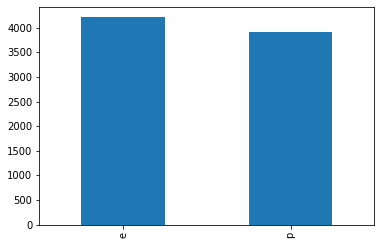

In [8]:
df.type.value_counts().plot.bar();

In [9]:
#
# Cantidad de ocurrencias por atributo de cada columna
#
# La revisión que se realiza es la siguiente:
#
#   * Se verifica la cantidad de registros leídos. Ok!.
#
#   * Se buscan variables con un solo nivel. Esto significa
#     que la variable contiene un valor constante y no tiene
#     categorias para un clasificador
#
for colname in df.columns:
    print(colname)
    print(df[colname].value_counts())
    print()

type
e    4208
p    3916
Name: type, dtype: int64

cap_shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap_shape, dtype: int64

cap_surface
y    3244
s    2556
f    2320
g       4
Name: cap_surface, dtype: int64

cap_color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap_color, dtype: int64

bruises
f    4748
t    3376
Name: bruises, dtype: int64

odor
n    3528
f    2160
y     576
s     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64

gill_attachment
f    7914
a     210
Name: gill_attachment, dtype: int64

gill_spacing
c    6812
w    1312
Name: gill_spacing, dtype: int64

gill_size
b    5612
n    2512
Name: gill_size, dtype: int64

gill_color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill_color, dtype: int64

stalk_shape
t    4608
e    3516
Name: stalk_shape, dtype: int64

stalk_root
b   

In [10]:
#
# La columna veil_type contiene un valor constante
# y se elimina (posicion 16 iniciando en cero)
#
df.drop('veil_type', axis=1, inplace=True)

Entrenamiento del modelo
---

In [11]:
class OneR:
    def __init__(self):
        self.rules = None
        
    def predict(self, X):
        df0 = X.copy()
        df0 = df0.set_index(self.rules.index.name, drop=False)
        df0 = df0.join(self.rules, rsuffix="_predicted_" + self.rules.index.name)
        df0.index = range(len(df0))
        return df0.copy()

    def fit(self, df, X_cols, target_col):
        # X: pandas DataFrame con las variables de entrada
        # target: columna con las clases

        def fit_var(var):
            #
            # Ajusta el modelo para la variable `var`
            #
            df0 = df[list(X_cols) + [target_col]].copy()
            df0["counter"] = 0
            df0 = df0.groupby([var, target_col], as_index=False).count()[[var, target_col, "counter"]]
            df0_max_counter = df0.groupby([var], as_index=False)["counter"].transform(max)
            df0_idx = df0["counter"] == df0_max_counter["counter"]
            df0 = df0.loc[df0_idx, [var, target_col]]
            df0 = df0.groupby(var, as_index=False).first()
            df0 = df0.set_index(var)
            return df0
    
        best_precision = None
        best_rules = None
        
        print('Reporte:')
        print('======================================')
        for column in X_cols:
            self.rules = fit_var(column)
            df0 = self.predict(df)
            current_precision = (df0[target_col] == df0[target_col + '_predicted_' + column]).sum()
            if best_precision is None or current_precision > best_precision:
                best_rules = self.rules.copy()
                best_precision = current_precision
                print("{:>12s} : {}".format(column, current_precision))
                
        self.rules = best_rules.copy()

In [12]:
#
# Aplicación al caso actual
#
m = OneR()
m.fit(df, X_cols=df.columns[1:], target_col='type')
m.rules

Reporte:
   cap_shape : 4584
 cap_surface : 4716
   cap_color : 4836
     bruises : 6044
        odor : 8004


,type
odor,
a,e
c,p
f,p
l,e
m,p
n,e
p,p
s,p
y,p


La porción final de la salida contiene la descripción de las reglas del clasificador

    Rules:
      If odor = almond   then type = edible
      If odor = creosote then type = poisonous 
      If odor = foul     then type = poisonous
      If odor = anise    then type = edible
      If odor = musty.   then type = poisonous
      If odor = none     then type = edible
      If odor = pungent  then type = poisonous
      If odor = spicy    then type = poisonous
      If odor = fishy    then type = poisonous
      

In [13]:
#
# Precsision
#
print('Precision: {:5.2f}%'.format(8004 / 8124 * 100))

Precision: 98.52%


Evaluación
---

In [14]:
from sklearn.metrics import confusion_matrix

p = m.predict(df)
confusion_matrix(
    p.type, 
    p.type_predicted_odor,
)

array([[4208,    0],
       [ 120, 3796]])